In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
#Functions to be used
def date(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%Y/%m/%d")
    date_date =  datetime.strptime(date_str, "%Y/%m/%d")
    return date_date

In [3]:
Cab_df = pd.read_csv("Data/Cab_Data.csv")
Cab_df.info()
Cab_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
City_df = pd.read_csv("Data/City.csv")
City_df.info()
City_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
Customer_ID_df = pd.read_csv("Data/Customer_ID.csv")
Customer_ID_df.info()
Customer_ID_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
Transaction_ID_df = pd.read_csv("Data/Transaction_ID.csv")
Transaction_ID_df.info()
Transaction_ID_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Checking for nulls

In [7]:
print(Cab_df.isnull().sum())
print(City_df.isnull().sum())
print(Customer_ID_df.isnull().sum())
print(Transaction_ID_df.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


Cleaning up column names with removing white spaces

In [8]:
Cab_df.columns = Cab_df.columns.str.replace(' ', '_')
Customer_ID_df.columns = Customer_ID_df.columns.str.replace(' ', '_')
Transaction_ID_df.columns = Transaction_ID_df.columns.str.replace(' ', '_')

In [9]:
Cab_df['Date_of_Travel'].value_counts()

43105    2022
43084    1123
43077    1100
43449    1086
43063    1085
         ... 
42388      88
42381      86
42380      85
42374      47
42373      25
Name: Date_of_Travel, Length: 1095, dtype: int64

<AxesSubplot:>

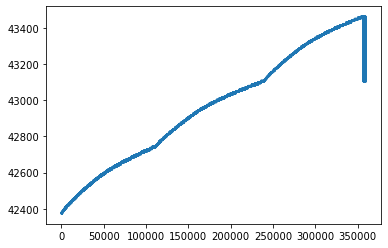

In [10]:
Cab_df['Date_of_Travel'].plot()
#Sees that the date is put in an incorrect fashion and must be corrected

In [11]:
Cab_df['Date_of_Travel'] = Cab_df['Date_of_Travel'].apply(lambda x:date(x))

In [12]:
Cab_df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776
